Loaded JSON for Record: 100
Slice Duration: 120s to 180s


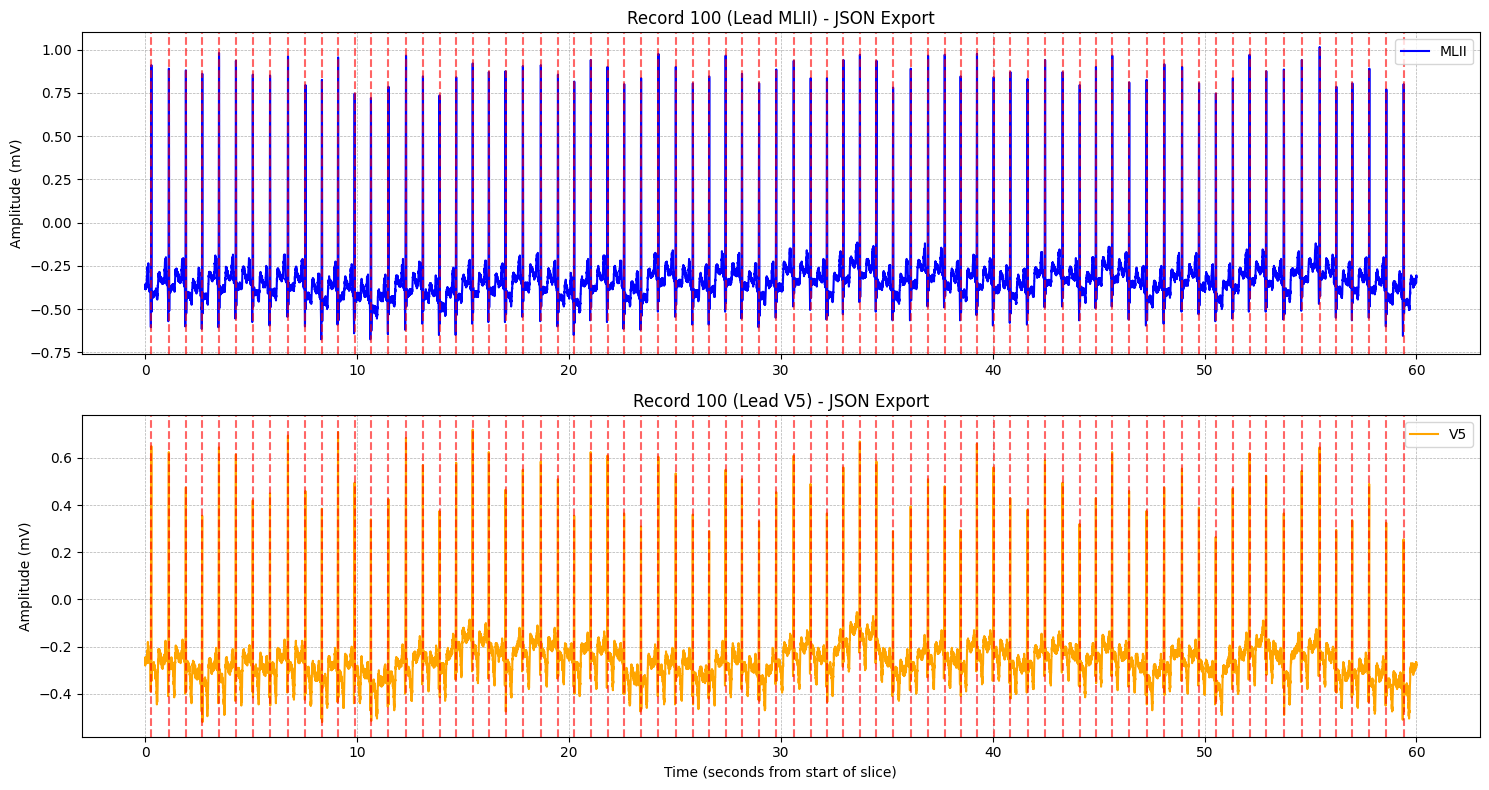

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
json_path = os.path.join('mit_bih_json_exports', '100.json')

# --- Load Data from JSON ---
if not os.path.exists(json_path):
    print(f"Error: {json_path} not found. Please run the export script first.")
    exit()

with open(json_path, 'r') as f:
    record_data = json.load(f)

print(f"Loaded JSON for Record: {record_data['record_id']}")
print(f"Slice Duration: {record_data['start_time_sec']}s to {record_data['end_time_sec']}s")

# --- Process Data for Plotting ---
fs = record_data['sampling_rate']
signals = np.array(record_data['signal'])  # Convert list back to numpy array
qrs_indices = np.array(record_data['qrs_indices'])
lead_names = record_data['leads']

# Create time axis (0 to 60 seconds, relative to the slice start)
time_axis = np.arange(len(signals)) / fs

# Convert QRS sample indices to time (seconds)
qrs_times = qrs_indices / fs

# --- Visualization ---
plt.figure(figsize=(15, 8))

def plot_qrs_markers(ax):
    for time in qrs_times:
        # Draw the vertical line only (no text label)
        ax.axvline(x=time, color='red', linestyle='--', alpha=0.6, linewidth=1.5)

# Plot Lead 1
ax1 = plt.subplot(2, 1, 1)
plt.plot(time_axis, signals[:, 0], color='blue', label=lead_names[0])
plot_qrs_markers(ax1)
plt.title(f"Record {record_data['record_id']} (Lead {lead_names[0]}) - JSON Export")
plt.ylabel("Amplitude (mV)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right")

# Plot Lead 2
ax2 = plt.subplot(2, 1, 2)
plt.plot(time_axis, signals[:, 1], color='orange', label=lead_names[1])
plot_qrs_markers(ax2)
plt.title(f"Record {record_data['record_id']} (Lead {lead_names[1]}) - JSON Export")
plt.xlabel("Time (seconds from start of slice)")
plt.ylabel("Amplitude (mV)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
1